### **1. Install Required Libraries**

In [1]:
###!pip install -q comet_ml gradio

In [2]:
from comet_ml import Experiment
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


In [3]:
import comet_ml

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
###!mkdir ~/.kaggle

In [6]:
###! pip install kaggle

In [7]:
###!cp /kaggle.json ~/.kaggle/

In [8]:
###!chmod 600 ~/.kaggle/kaggle.json

In [9]:
###!pip install keras-tuner

In [10]:
###!kaggle datasets download -d muhammadehsan000/diabetes-healthcare-dataset

In [11]:
##! unzip /content/diabetes-healthcare-dataset.zip

In [12]:
experiment = Experiment(api_key="u4v1dA5tEc5tOx0euTnHNMnDs",
                        project_name="ml-test",
                        workspace="debmalyaray9989",
                       )


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/debmalyaray9989/ml-test/349a3b144a2c4559bd16721d43c87df3



In [13]:
diabetes_data = pd.read_csv('/content/Diabetes-Data.csv')
diabetes_data.head(5)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


In [14]:
diabetes_data.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

{'web': 'https://www.comet.com/api/image/download?imageId=56d5f65a981848e4beba1830d2761ef8&experimentKey=349a3b144a2c4559bd16721d43c87df3',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=56d5f65a981848e4beba1830d2761ef8&experimentKey=349a3b144a2c4559bd16721d43c87df3',
 'imageId': '56d5f65a981848e4beba1830d2761ef8'}

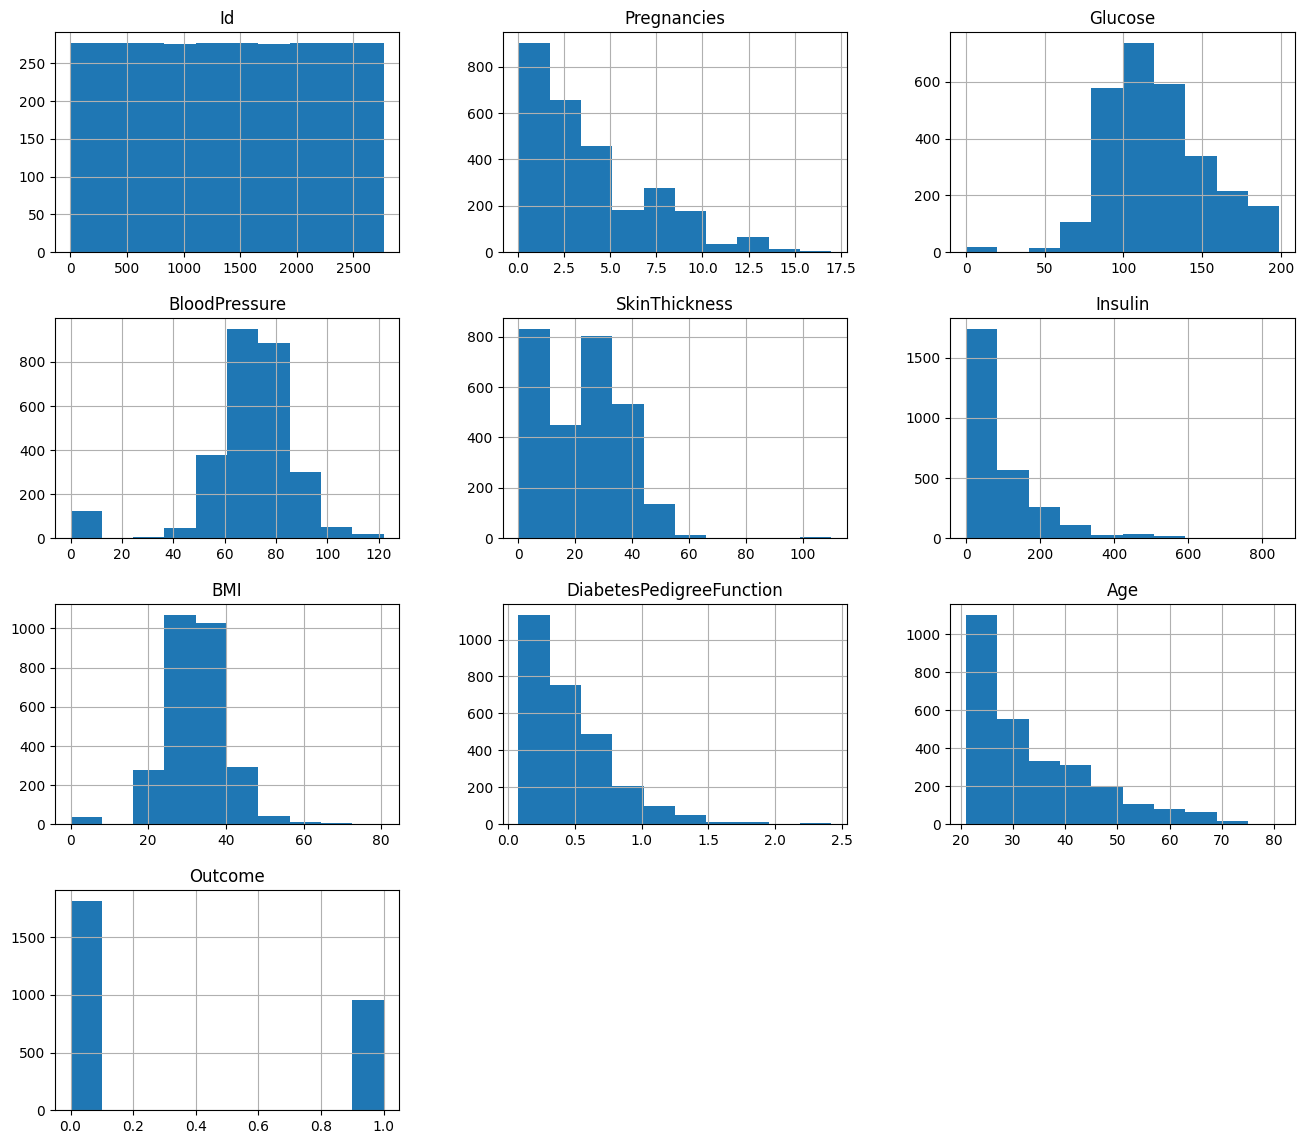

In [15]:
diabetes_data.hist(figsize=(16,14));
experiment.log_figure(figure=plt)

In [16]:
diabetes_data.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

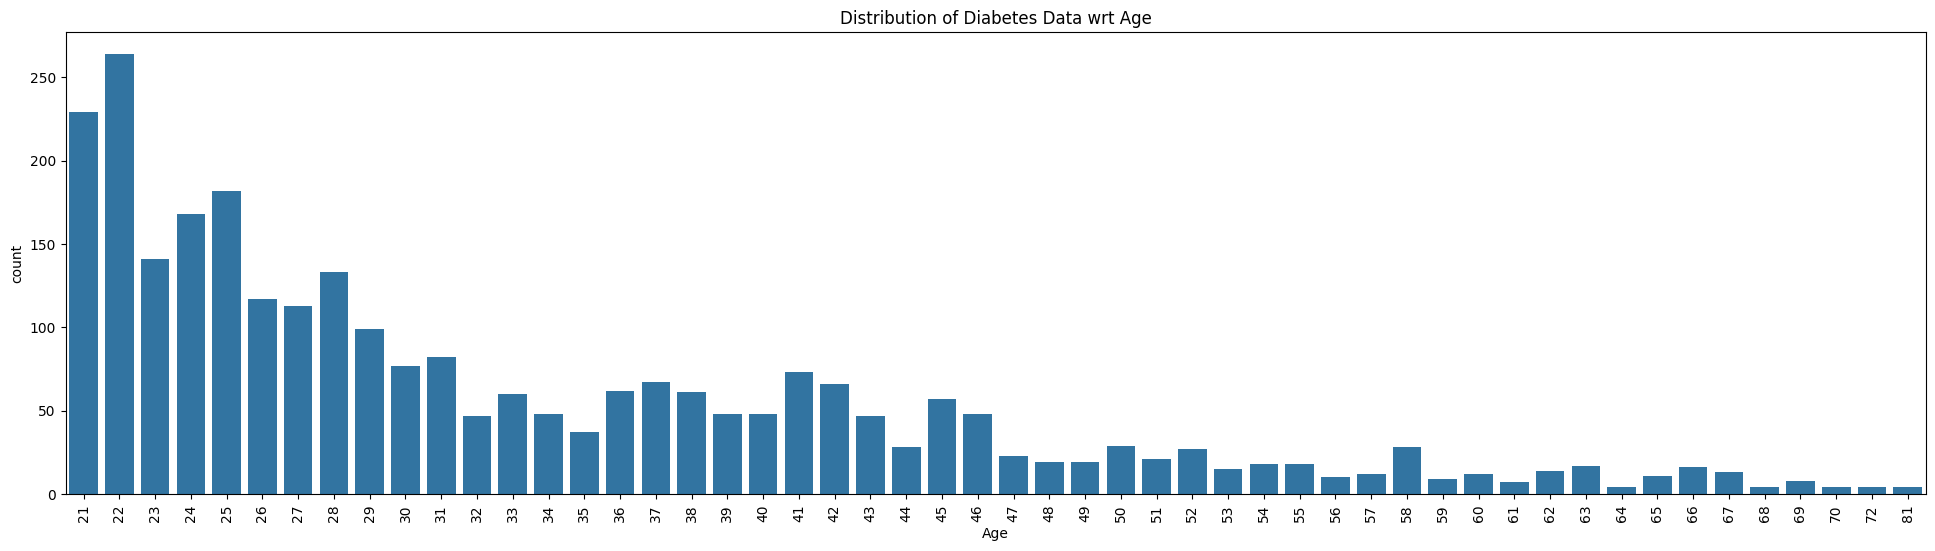

In [17]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=diabetes_data.Age)
ax.set_title("Distribution of Diabetes Data wrt Age")
experiment.log_figure(figure=plt)
plt.show()


In [18]:
diabetes_data.dtypes

,0
Id,int64
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = diabetes_data.drop(columns="DiabetesPedigreeFunction")
y = diabetes_data['DiabetesPedigreeFunction']

In [21]:
y = pd.DataFrame(y)

In [22]:
print(X.columns)
print(y.columns)

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'Age', 'Outcome'],
      dtype='object')
Index(['DiabetesPedigreeFunction'], dtype='object')


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y , random_state=104,test_size=0.25, shuffle=True)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2076, 9)
(692, 9)
(2076, 1)
(692, 1)


In [25]:

#Specifing the hyperparameters we want to tune in our algorithm
model_params ={
    "n_estimators": {
            "type": "discrete",
            "values": [11, 12, 13]
    },
    "max_depth": {
            "type": "discrete",
            "values": [3, 4, 5]
    },
    "learning_rate": {
            "type": "discrete",
            "values": [0.05, 0.1, 0.2]
    },
    "min_child_weight": {
            "type": "discrete",
            "values": [1, 2, 3]
    },
    "subsample": {
            "type": "discrete",
            "values": [0.8, 0.9, 1]
    }
}

In [26]:
# Specifing the parameters with want to supply to the optimizer config
optimizer_dict= {
    "algorithm": "random",
    "trials": 1,
    "parameters": model_params,
    "name": "My Random Search",
}

In [27]:
# Initializing our optimizer
opt = comet_ml.Optimizer(api_key="u4v1dA5tEc5tOx0euTnHNMnDs",  config=optimizer_dict)

COMET INFO: 6669769cbe0b43578f4b6d5279f40422
COMET INFO: Using optimizer config: {'algorithm': 'random', 'configSpaceSize': 243, 'endTime': None, 'id': '6669769cbe0b43578f4b6d5279f40422', 'lastUpdateTime': None, 'maxCombo': 0, 'name': 'My Random Search', 'parameters': {'learning_rate': {'type': 'discrete', 'values': [0.05, 0.1, 0.2]}, 'max_depth': {'type': 'discrete', 'values': [3, 4, 5]}, 'min_child_weight': {'type': 'discrete', 'values': [1, 2, 3]}, 'n_estimators': {'type': 'discrete', 'values': [11, 12, 13]}, 'subsample': {'type': 'discrete', 'values': [0.8, 0.9, 1]}}, 'predictor': None, 'spec': {'gridSize': 10, 'maxCombo': 0, 'metric': 'loss', 'minSampleSize': 100, 'retryAssignLimit': 0, 'retryLimit': 1000}, 'startTime': 437744663, 'state': {'mode': None, 'seed': 3261239819, 'sequence': [], 'sequence_i': 0, 'sequence_pid': None, 'sequence_retry': 0, 'sequence_retry_count': 0}, 'status': 'running', 'suggestion_count': 0, 'trials': 1, 'version': '2.0.26'}


In [28]:
###! pip install xgboost

In [29]:
from xgboost import XGBRegressor

In [30]:
for experiment in opt.get_experiments(project_name="Tree-based ML-Optimize"):
    # Initializing XGBoost
    # Passing the each paramter to our model by using the get_parameter method from experiment
    model = XGBRegressor(
        n_estimators=experiment.get_parameter("n_estimators"),
        max_depth=experiment.get_parameter("max_depth"),
        learning_rate=experiment.get_parameter("learning_rate"),
        min_child_weight=experiment.get_parameter("min_child_weight"),
        subsample=experiment.get_parameter("subsample"),
        random_state=42)

Streaming output truncated to the last 5000 lines.
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/debmalyaray9989/tree-based-ml-optimize/ecbd734bc5984f8199619ecc6df995f2

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: -----------------------------------------------------------------------------------

In [31]:
# Training the model with the training set.
my_pipeline = Pipeline(steps=[('model', model)])
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None, min_child_weight=2,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=11, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [32]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, r2_score

In [33]:
# Calculating the r2 score on the validation data
y_test_pred = my_pipeline.predict(X_test)
r2_val = np.round(r2_score(y_test, y_test_pred),2)

In [34]:
# Calculating the r2 score on the training data
y_train_pred= my_pipeline.predict(X_train)
r2_train = np.round(r2_score(y_train, y_train_pred),2)

In [35]:
# logging the metrics to the comet website
experiment.log_parameter("random_state", 42)
experiment.log_metrics({"r2_validation": np.round(r2_val,2),
                            "r2_train": np.round(r2_train,2)})

In [36]:
from sklearn.metrics import median_absolute_error, mean_squared_error

In [37]:
mae = mean_squared_error(y_test, y_test_pred)

In [38]:
metrics = {"mean_squared_error":mae}

In [39]:
experiment.log_metrics(metrics)

In [40]:
###! pip install joblib

In [41]:
import joblib

In [42]:
joblib.dump(my_pipeline, 'my_pipeline_model.joblib')

['my_pipeline_model.joblib']

In [43]:
### u4v1dA5tEc5tOx0euTnHNMnDs

In [44]:
from comet_ml import Experiment
exp = Experiment(api_key="u4v1dA5tEc5tOx0euTnHNMnDs")
exp.log_model("my_pipeline_model", "/content/my_pipeline_model.joblib")

COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : sure_rasp_6086
COMET INFO:     url                   : https://www.comet.com/debmalyaray9989/tree-based-ml-optimize/87824afbb5c741ebb26cd2e881f90335
COMET INFO:   Metrics:
COMET INFO:     mean_squared_error : 0.07724524127574263
COMET INFO:     r2_train           : 0.45
COMET INFO:     r2_validation      : 0.33
COMET INFO:   Others:
COMET INFO:     optimizer_count        : 243
COMET INFO:     optimizer_id           : 6669769cbe0b43578f4b6d5279f40422
COMET INFO:     optimizer_metric       : los

{'web': 'https://www.comet.com/api/asset/download?assetId=88f082613bc6466ab16ebede3b9328e5&experimentKey=a7d823036a8b42a8b4f78395bc808e23',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=88f082613bc6466ab16ebede3b9328e5&experimentKey=a7d823036a8b42a8b4f78395bc808e23',
 'assetId': '88f082613bc6466ab16ebede3b9328e5'}

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
